# Introdução
Neste notebook, iremos analisar a obtenção de um sinal no tempo $x(t)$ a partir da sua transformada de Fourier $X(\omega)$

# Sinal na frequência $X(\omega)$

Considere um sinal $x(t)$ cuja transformada de Fourier $\hat{x}(t) \triangleq X(\omega)$ é dada por:

$$
X(\omega) = \frac{1}{1+j\omega} \quad \therefore \quad X(\omega) = \frac{1}{1+\omega^2} -j\frac{\omega}{1+\omega^2}
$$

Da expressão acima, podemos concluir que:
* $\mathsf{Re}\{X(\omega)\} = \frac{1}{1+\omega^2}$
* $\mathsf{Im}\{X(\omega)\} = \frac{-\omega}{1+\omega^2}$

Podemos representar graficamente as partes real e imaginária em função da frequência $\omega$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos um intervalo para $\omega$ e criamos os valores para as partes real e imaginária

In [2]:
w = np.linspace(-20,20,512)
real_x = 1/(1+w**2)
imag_x = -w/(1+w**2)

Exibimos os gráficos das parte real e imaginária em função de $\omega$

In [24]:
# Textos e legendas
x_label          = '$\omega$ (rad/s)'
title_text_real  = r'$\mathsf{Re}\{X(\omega)\}$'
title_text_imag  = r'$\mathsf{Im}\{X(\omega)\}$'

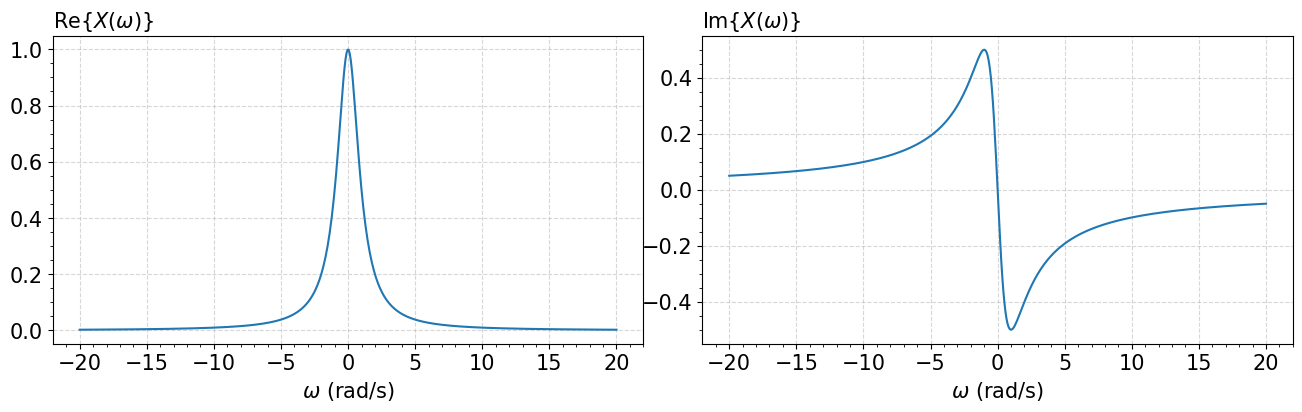

In [50]:
fig, axes = plt.subplots(1,2,figsize=(16,4),gridspec_kw={'wspace':0.1})

# Parâmetros padrão
for ax in axes.flat:
    ax.grid(alpha=0.5, linestyle='--')
    ax.minorticks_on()
    ax.tick_params(axis='both',labelsize=15)
    ax.set_xlabel(x_label,fontsize=15)
    ax.set_title(title_text_real,loc='left',fontsize=15)
    
ax_real = axes.flat[0]
ax_real.plot(w,real_x)
ax_real.set_title(title_text_real,loc='left',fontsize=15)

ax_imag = axes.flat[1]
ax_imag.plot(w,imag_x)
ax_imag.set_title(title_text_imag,loc='left',fontsize=15)
plt.show()

Também podemos representar o plano complexo para alguns valores de $\omega$

In [30]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [31]:
def X_fourier(w):
    return np.array(1/(1j*w +1))

In [67]:
# Parâmetros
alpha         = 0.3
cor           = 'tab:blue'
estilo_linha  = '--'
x_label       = r'$\mathsf{Re}\{X(\omega)\}$'
title_text    = r'$\mathsf{Im}\{X(\omega)\}$'
x_titulo      = 0.4

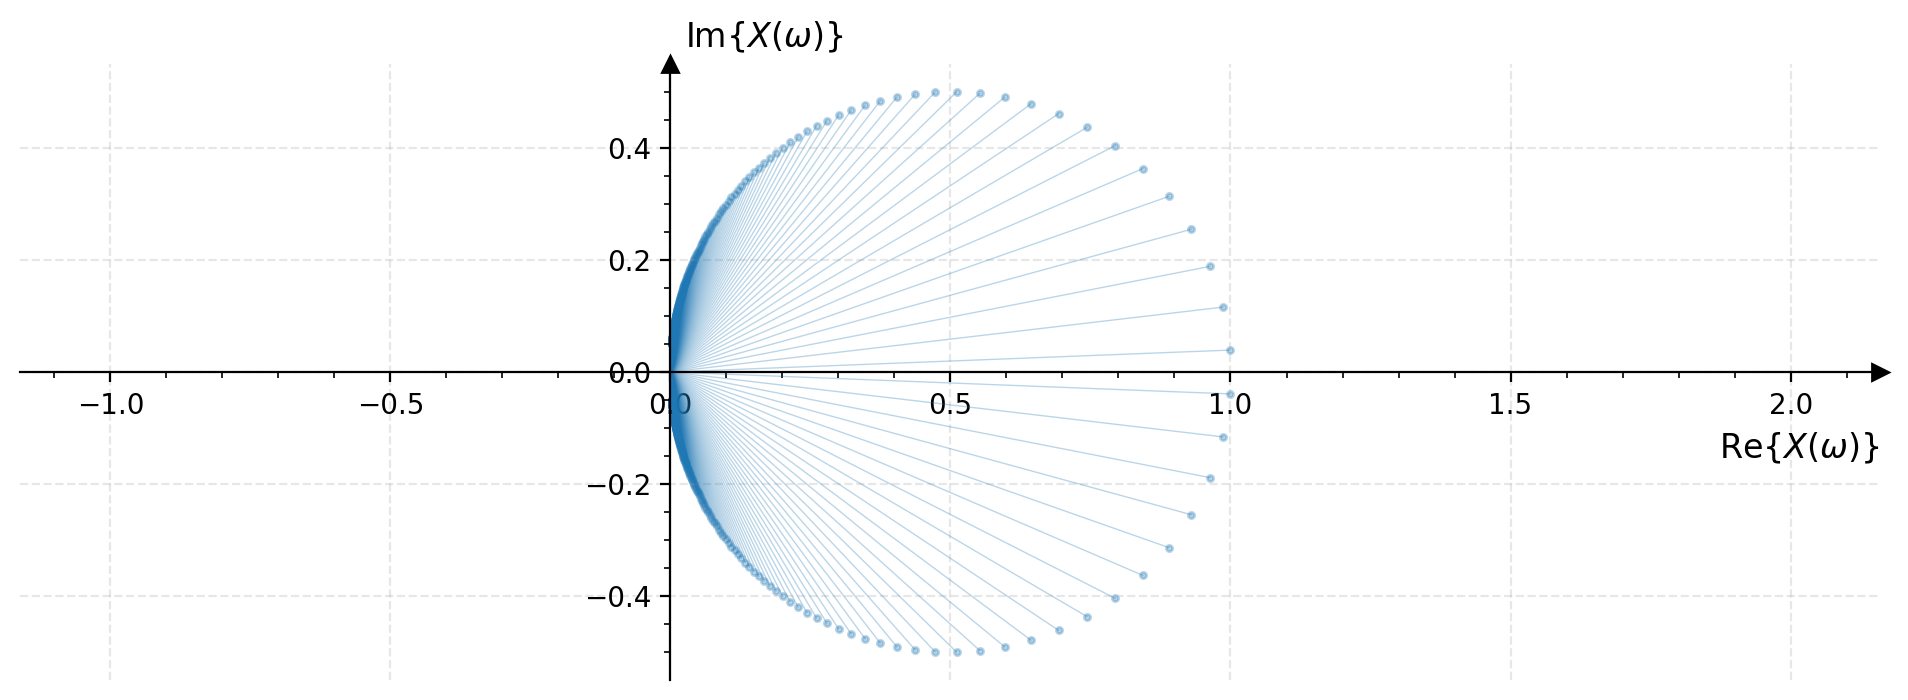

In [68]:
fig, ax = plt.subplots(figsize=(12,4),dpi=200)

ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

for omega in w:
    X = X_fourier(omega)
    ax.scatter(X.real,X.imag,alpha=alpha,c=cor,s=5)
    ax.plot([0,X.real],[0,X.imag],alpha=alpha,c=cor,lw=0.5)
    ax.grid(alpha=alpha, linestyle=estilo_linha)
    ax.minorticks_on()

ax.axis('equal')    
ax.set_xlabel(x_label, loc='right', fontsize=12)
ax.set_title(title_text,x=x_titulo)
plt.show()

Visualizando todos os eixos simultanemanete, obtemos:
    
<center>
<img src ='.\Images\1.png' width=400>
</center>

A partir de $X(\omega)$, também podemos obter:
* $|X(\omega)| = \frac{1}{\sqrt{1+\omega^2}}$
* $\varphi\{X(\omega)\} = \arctan{\frac{\mathsf{Im} \{X(\omega)\}}{\mathsf{Re} \{X(\omega)\}}}$

In [69]:
mag  = np.sqrt(real_x**2 + imag_x**2)
fase = np.arctan(imag_x/real_x)

In [85]:
# Parâmetros do gráfico
y_label_fase = r'$\varphi\{X(\omega)\}$'
x_label_fase = r'$\omega$ (rad/s)'
y_label_mag  = r'$|X(\omega)|$'
phase_ticks_format = np.arange(-90,120,30)
phase_ticks_labels = [f'{f}°' for f in phase_ticks_format]

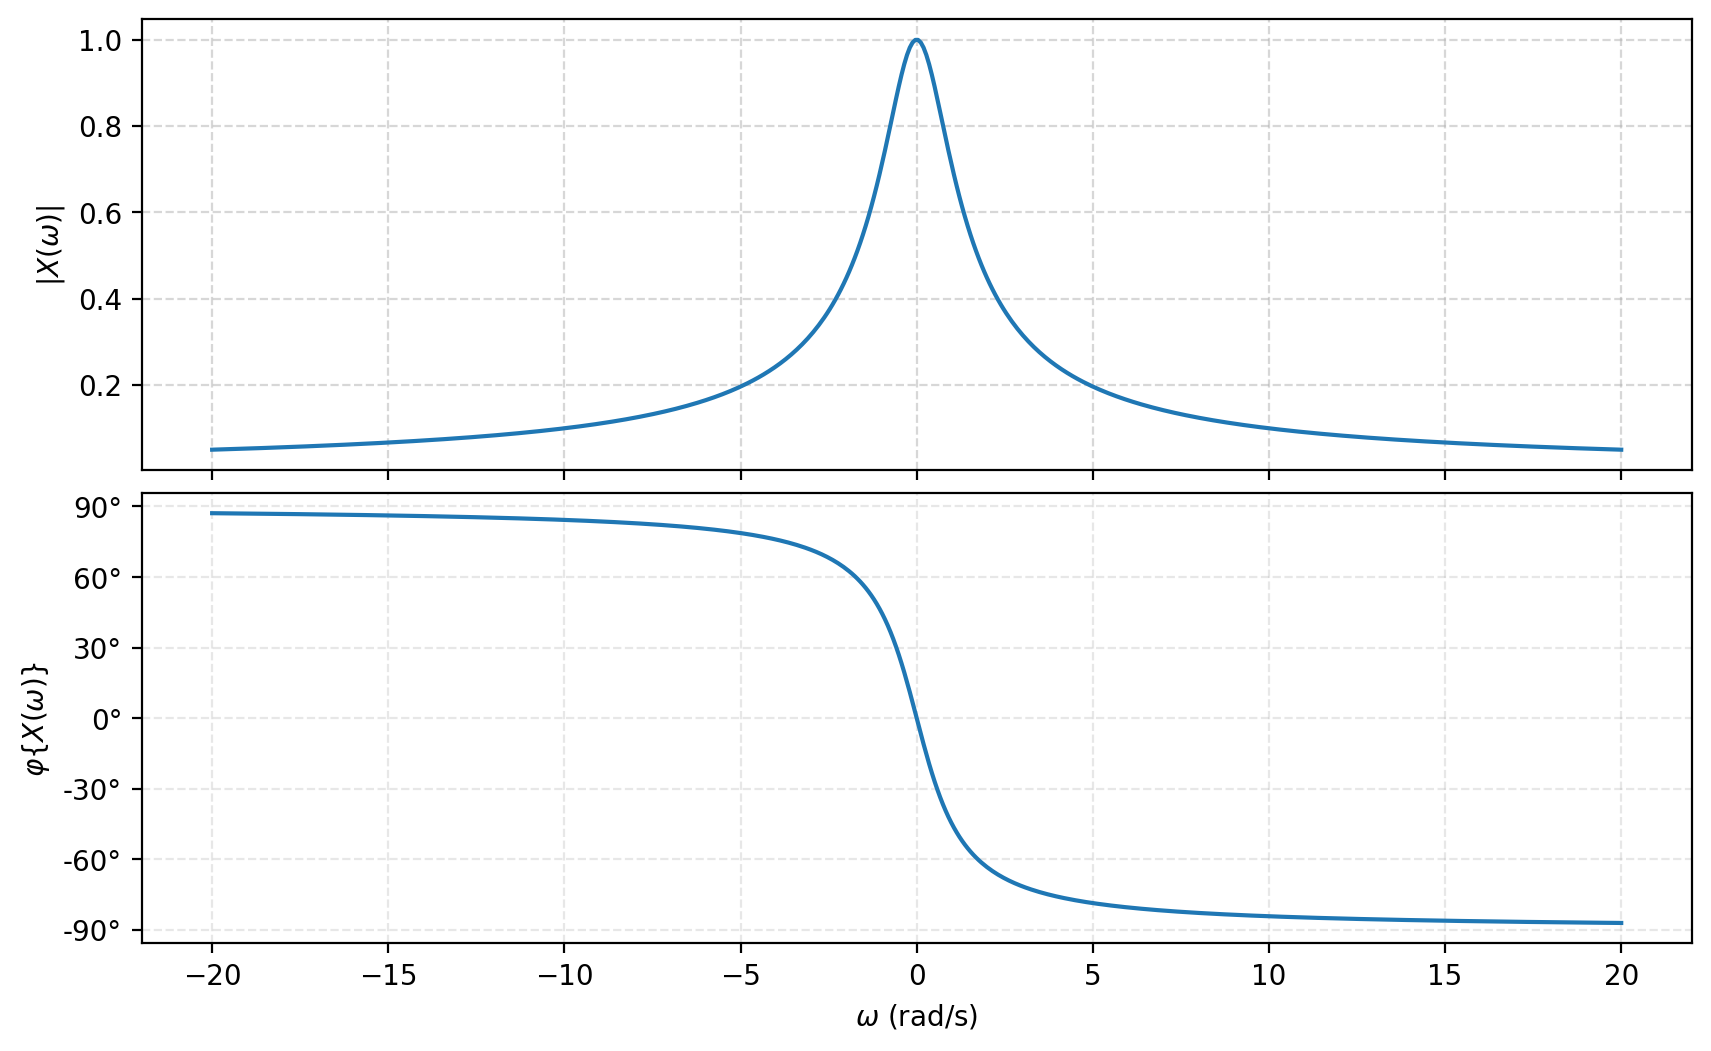

In [88]:
fig, axes = plt.subplots(2,1,figsize=(10,6),dpi=200,sharex=True,gridspec_kw={'hspace':0.05})

ax_mag = axes.flat[0]
ax_mag.plot(w,mag)
ax_mag.set_ylabel(y_label_mag)
ax_mag.grid(alpha=0.5,ls='--')

ax_fase = axes.flat[1]
ax_fase.plot(w,fase*(180/np.pi))
ax_fase.set_xlabel(x_label_fase)
ax_fase.set_ylabel(y_label_fase)
ax_fase.set_yticks(phase_ticks_format,phase_ticks_labels)
ax_fase.grid(alpha=alpha,ls=estilo_linha)

A função $x(t)$ cuja transformada $X(\omega)$ vale $\frac{1}{1+j\omega}$ pode ser obtida a partir da transformada inversa. Todavia, por se tratar de uma função elementar, é conhecido que:

$$
X(\omega) \overset{\mathcal{F}}{\longleftrightarrow} x(t) \quad \therefore \quad  \frac{1}{1+j\omega} \overset{\mathcal{F}}{\longleftrightarrow} e^{-\alpha t}u(t)
$$

Exibindo $x(t)$

In [89]:
t = np.linspace(0,10,1000)
x_t = np.exp(-t)

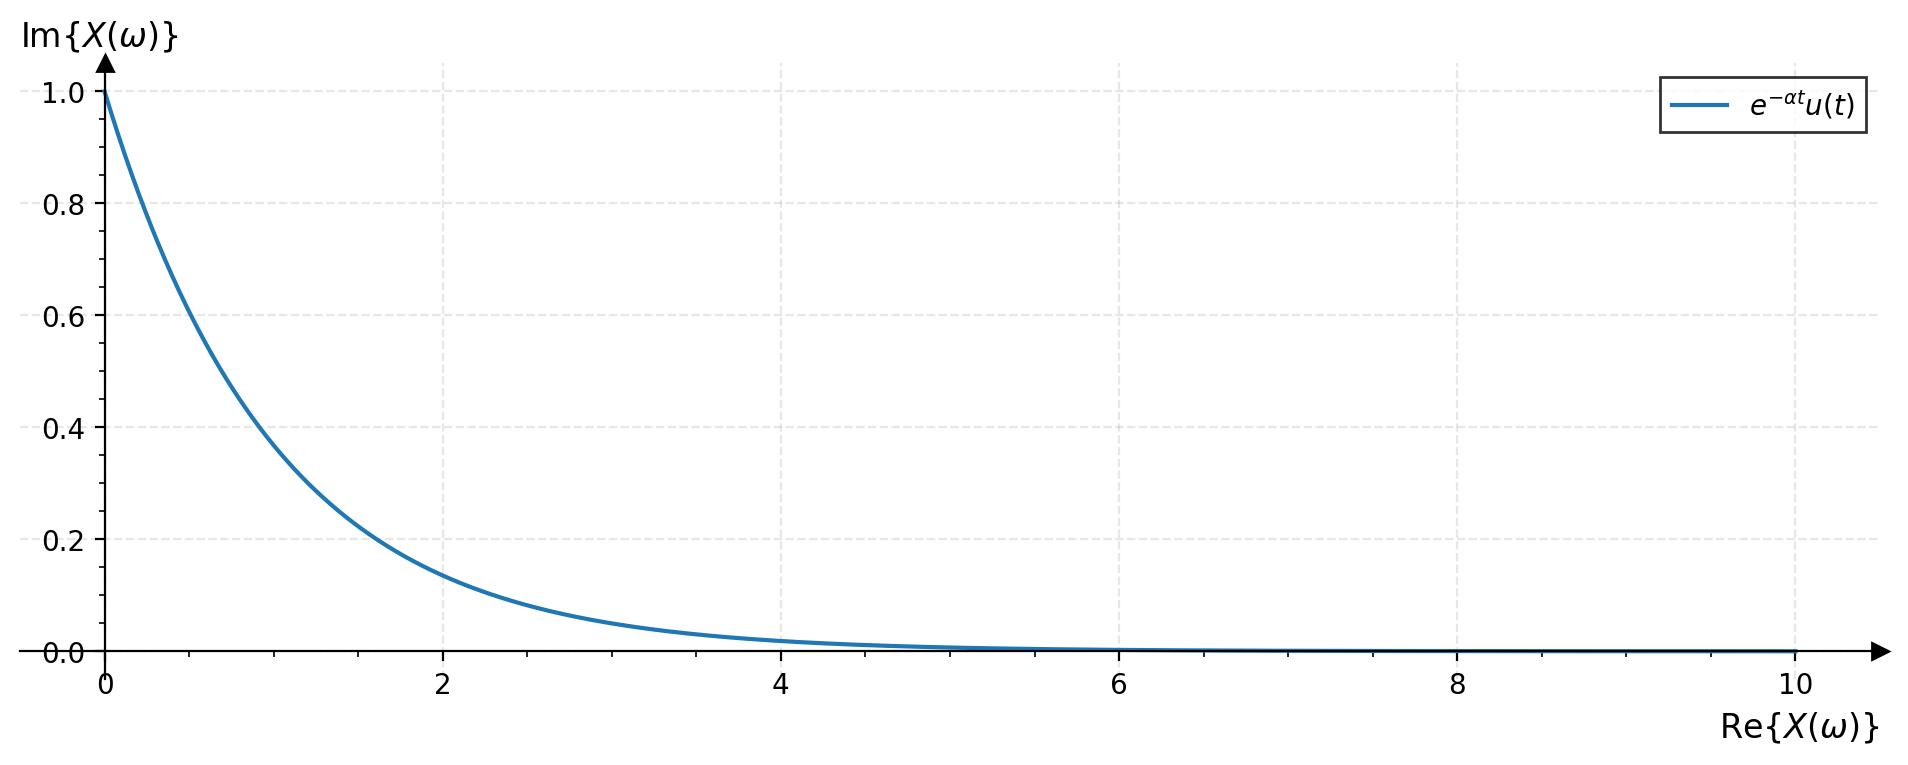

In [104]:
fig, ax = plt.subplots(figsize=(12,4),dpi=200)

ax.spines[["left", "bottom"]].set_position(("data", 0))
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot(t,x_t,label=r'$e^{-\alpha t}u(t)$')
ax.legend(fancybox=False,edgecolor='k')
ax.grid(alpha=alpha, linestyle=estilo_linha)
ax.minorticks_on()

ax.set_xlabel(x_label, loc='right',fontsize=12)
ax.set_title(title_text,loc='left')
plt.show()

In [246]:
# Amostras discretas de algumas frequências
w_discreto = np.arange(1,21,1)

In [247]:
# Mapa de cores para caracterizar as magnitudes e frequências
norm = Normalize(vmin=min(w_discreto), vmax=max(w_discreto))
cmap = plt.colormaps['GnBu_r']

In [248]:
label_reconstruido = 'Sinal reconstruido $\mathcal{F}^{-1}\{X(\omega)\}$'
label_original     = 'Sinal original $x(t)$'
titulo             = r'Componentes da forma $x(t)=|X(j\omega)|cos(\omega t)$'

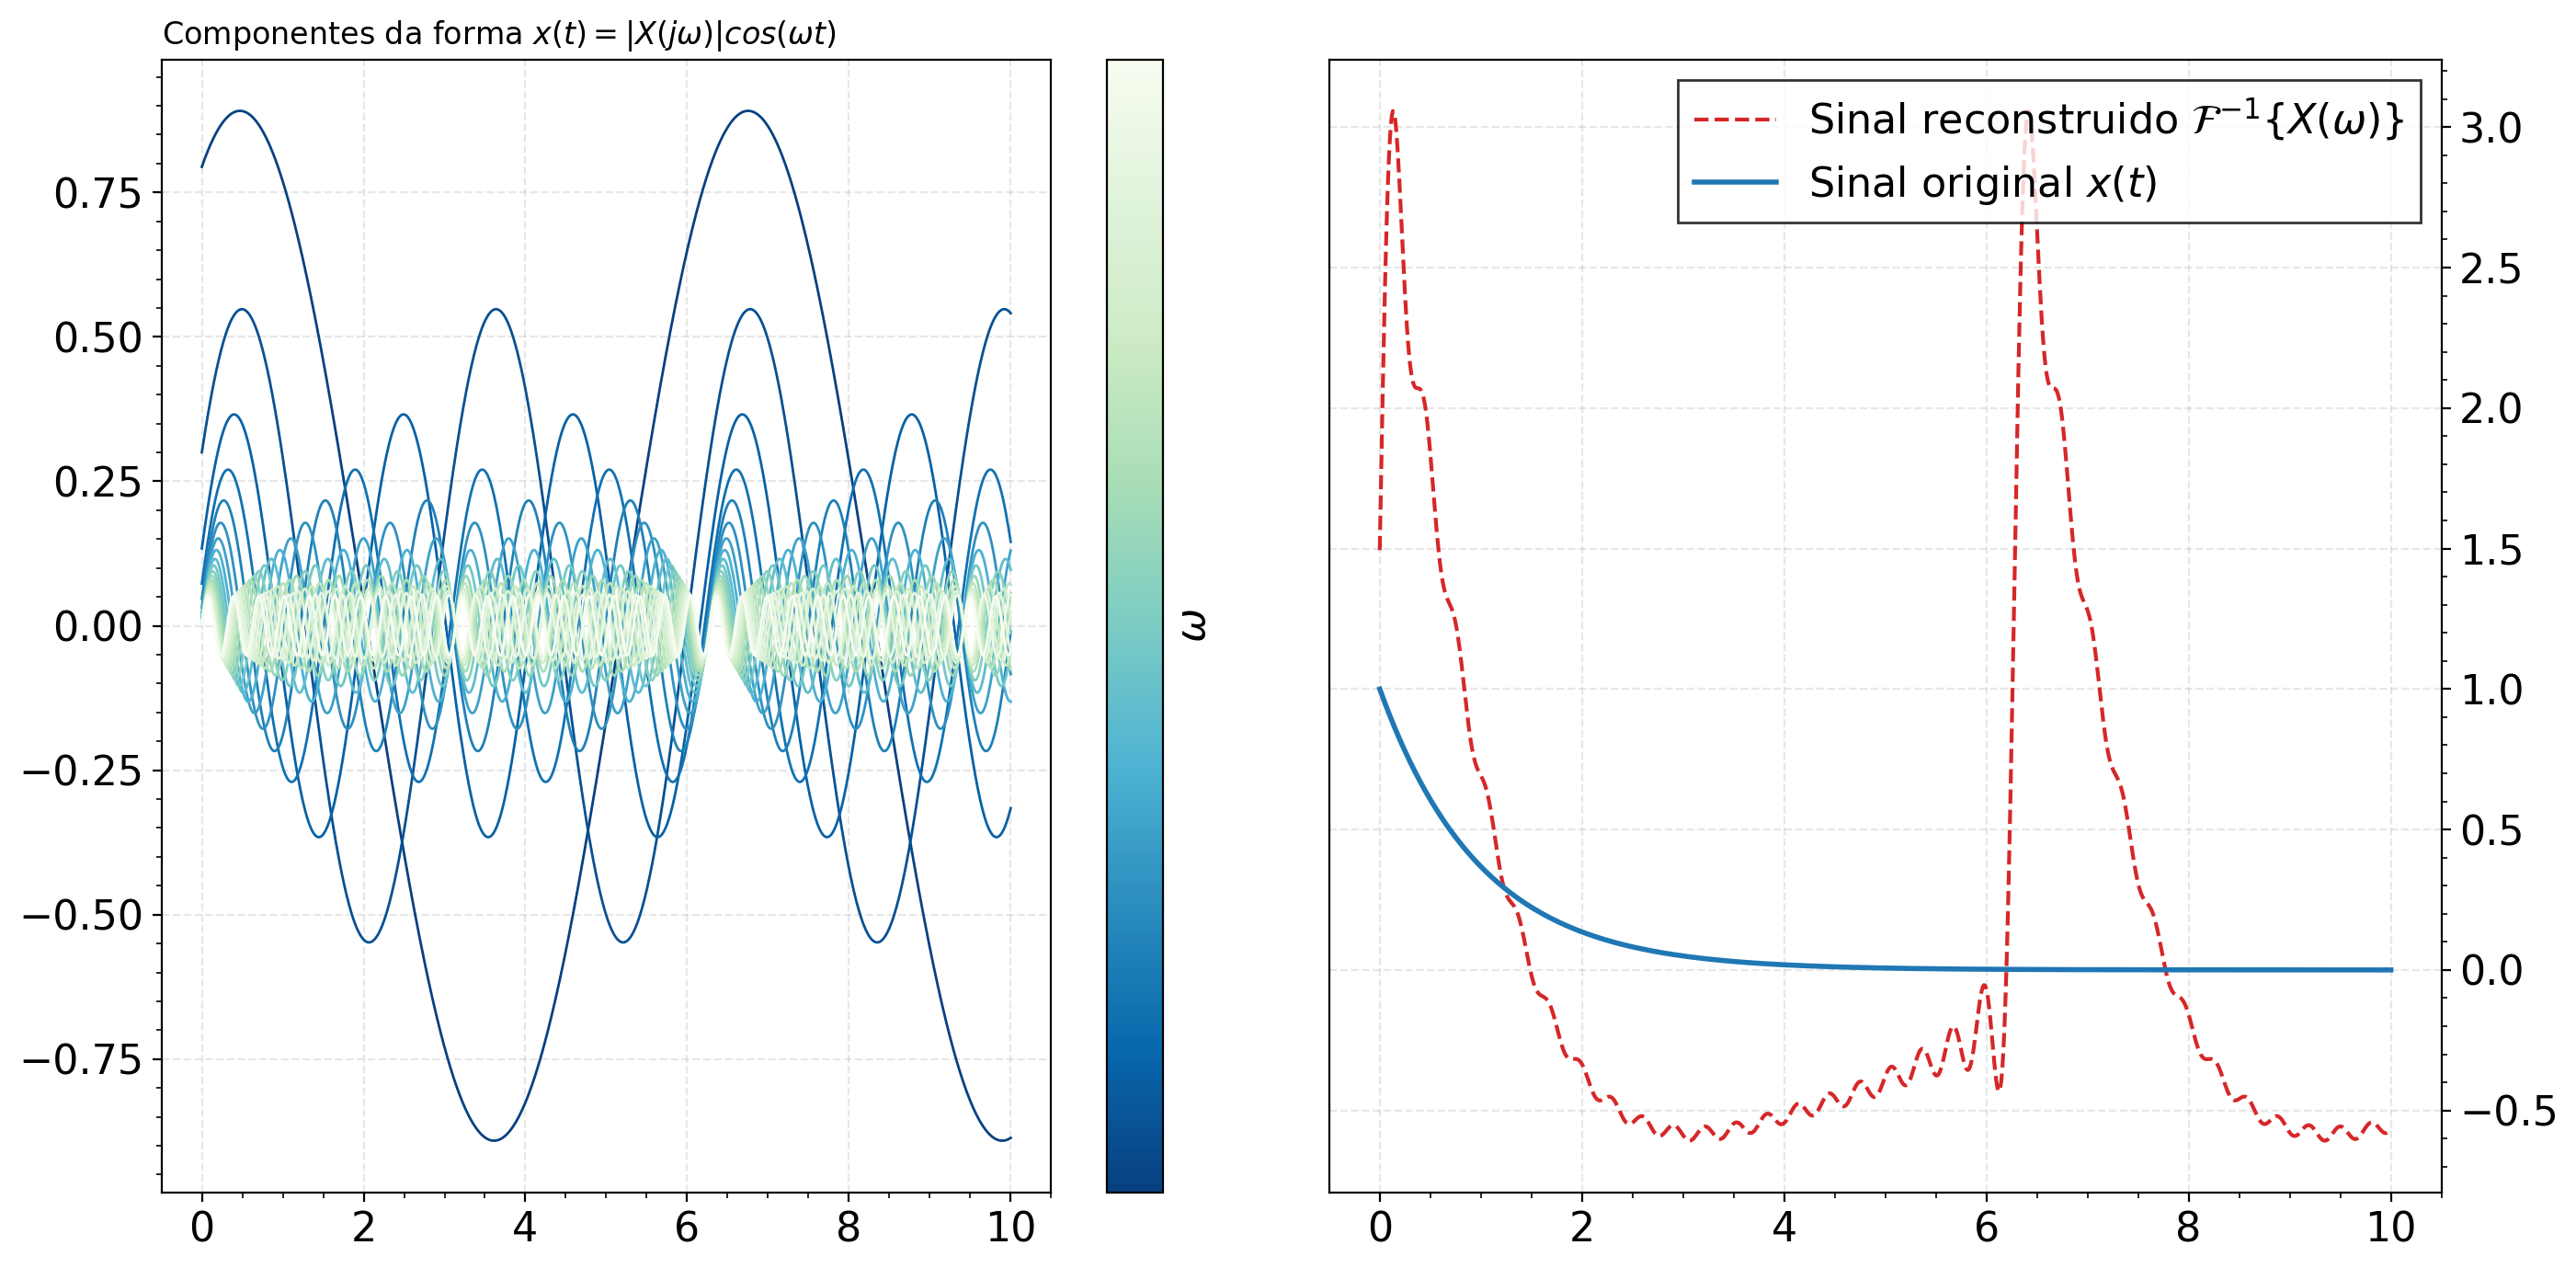

In [249]:
fig, axes = plt.subplots(1,2,figsize=(16,8),dpi=200,gridspec_kw={'wspace':0.05})

sinal_reconstruido = np.zeros_like(t)

# Gráfico dos sinais constituintes
for om in w_discreto:
    color = cmap(norm(om))
    amp  = mag[np.round(w,0) == om][0]
    pha  = fase[np.round(w,0) == om][0]
    compontente = amp*np.cos(om*t + pha)
    sinal_reconstruido += compontente
    axes[0].plot(t, compontente, color=color,lw=1)
    
axes[0].minorticks_on()
axes[0].grid(alpha=alpha,ls=estilo_linha)
axes[0].tick_params(axis='both',labelsize=16)
axes[0].set_title(titulo,loc='left')

# Sinal reconstruido pela inversa
axes[1].plot(t, sinal_reconstruido, label=label_reconstruido, ls='--',c='tab:red')
axes[1].plot(t,x_t,color='tab:blue',label=label_original,lw=2)
axes[1].yaxis.tick_right()
axes[1].grid(alpha=alpha,ls=estilo_linha)
axes[1].minorticks_on()
axes[1].yaxis.set_label_position("right")
axes[1].spines['right'].set_position(('outward', 0))
axes[1].legend(fancybox=False,edgecolor='k',fontsize=16)
axes[1].tick_params(axis='both',labelsize=16)

sm = ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=axes[0], orientation='vertical',ticks=[])
cbar.set_label('$\omega$', fontsize=16)
cbar.ax.tick_params(labelsize=16)

In [243]:
w_discreto = np.arange(1,21,1)

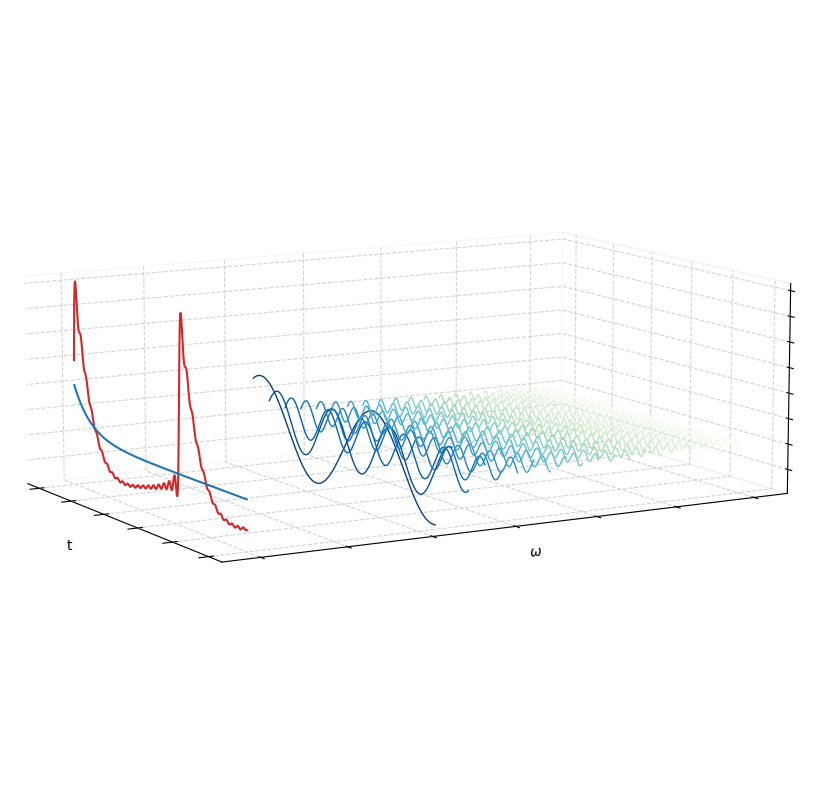

In [245]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

sinal_reconstruido = np.zeros_like(t)

# Gráfico dos sinais constituintes
for om in w_discreto:
    color = cmap(norm(om))
    amp  = mag[np.round(w,0) == om][0]
    pha  = fase[np.round(w,0) == om][0]
    compontente = amp*np.cos(om*t + pha)
    sinal_reconstruido += compontente
    ax.plot(t, compontente,zs=om, zdir='y',color=color,lw=1)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis.pane.fill = True
    axis.pane.set_facecolor('white')
    axis._axinfo['grid'].update(color='lightgray')
    
ax.set_xlabel('t')
ax.set_ylabel(r'$\omega$')
ax.set_zlabel(r'$|X(j\omega)|$')
ax.plot(t, sinal_reconstruido, zs=-10, zdir='y',label=label_reconstruido, c='tab:red')
ax.plot(t, x_t, zs=-10, zdir='y',label=label_reconstruido, c='tab:blue')
ax.set_box_aspect([2, 3, 1])
ax.view_init(elev=10, azim=-30, roll=0)